In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/TP - Estadística/dataset2020.csv')

# Renobrar las columnas del df
df = df.rename(columns={
    'tipo_de_violencia_domestica': 'Doméstica',
    'tipo_de_violencia_economica_y_patrimonial': 'Económica',
    'tipo_de_violencia_fisica': 'Física',
    'tipo_de_violencia_psicologica': 'Psicológica',
    'tipo_de_violencia_simbolica': 'Simbólica',
    'tipo_de_violencia_sexual': 'Sexual',
    'modalidad_de_violencia_institucional': 'Institucional',
    'modalidad_de_violencia_laboral': 'Laboral',
    'modalidad_de_violencia_mediatica': 'Mediatica',
    'modalidad_de_violencia_obstetrica': 'Obstetrica',
    'modalidad_de_violencia_otras': 'Otras',
    'modalidad_violencia_contra_libertad_reproductiva': 'Libertad Reproductiva'

})

#Posibles preguntas de análisis:
#¿Cuál es la distribución de las llamadas por edad y género de la víctima? ¿Hay grupos de edad o género que llaman con más frecuencia?
#¿Cuál es la distribución geográfica de las llamadas, es decir, cuáles son las provincias con mayor cantidad de llamadas al 144? ¿Hay diferencias significativas en la distribución de llamadas entre provincias?
#¿Cuáles son los tipos de violencia más frecuentes mencionados en las llamadas? ¿Hay diferencias en los tipos de violencia reportados según el género de la víctima o el vínculo con el agresor?
#¿Hay patrones significativos en el género del victimario reportado en las llamadas? ¿Hay diferencias en el género del victimario según el género de la víctima o el tipo de violencia reportado?

#Estos análisis me los sugirió ChatGPT:
#Análisis de tendencias: ¿Hubo un aumento o disminución en la cantidad de llamadas recibidas en el 144 a lo largo del año 2020? ¿Hay patrones estacionales en la cantidad de llamadas, por ejemplo, más llamadas en ciertos meses del año que en otros?
#Análisis de asociación: ¿Hay asociaciones entre la edad de la víctima y el tipo de violencia reportado en las llamadas? ¿O entre el género de la víctima y el tipo de violencia? ¿Cómo se relaciona el tipo de violencia reportado con el vínculo con el agresor?
#Análisis de modelos predictivos: ¿Es posible predecir la probabilidad de que una llamada al 144 reporte un tipo de violencia específico en función de ciertas variables, como la edad o el género de la víctima, el vínculo con el agresor o la provincia donde se realiza la llamada?
#Análisis de correlación espacial: ¿Hay una correlación geográfica entre la cantidad de llamadas realizadas en una determinada provincia y los niveles de violencia de género informados en esa misma provincia en otros indicadores estadísticos, como denuncias en comisarías o casos de femicidio?
#Análisis de texto: ¿Es posible extraer patrones o temas recurrentes en los comentarios o descripciones incluidos en las llamadas al 144, utilizando técnicas de análisis de texto o minería de datos?


#Algo que nos hubiese gustado hacer, pero no lo hicimos porque escapa a la consigna del TP, es hacer un énfasis en la etapa ASPO de este año, dado que fue un año especial por la pandemia. Hubiese sido interesante analizar si el Aislamiento Obligatorio
#afectó de alguna manera las tasas y tipos de violencias respecto a las llamadas del 144.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29248 entries, 0 to 29247
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   edad_persona_en_situacion_de_violencia             29248 non-null  int64  
 1   Año                                                29248 non-null  int64  
 2   Trimestre                                          29248 non-null  object 
 3   Mes                                                29248 non-null  object 
 4   Día                                                29248 non-null  int64  
 5   genero_de_la_persona_agresora                      29248 non-null  object 
 6   genero_persona_en_situacion_de_violencia           29248 non-null  object 
 7   Institucional                                      467 non-null    float64
 8   Laboral                                            320 non-null    float64
 9   Mediat

In [ ]:
#Contamos la totalidad de casos:
totalCasos = df.count()[0]
display(totalCasos)

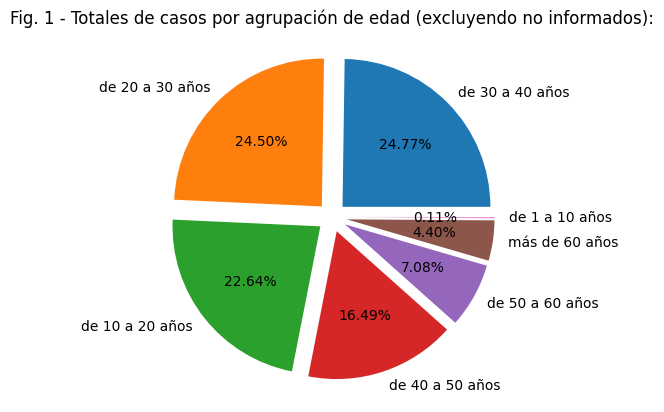

In [ ]:
#Agregamos una columna de agrupación categórica por edades (grupo_edades):

edades = ["de 1 a 10 años","de 10 a 20 años","de 20 a 30 años", "de 30 a 40 años", "de 40 a 50 años", "de 50 a 60 años", "más de 60 años"]
cond_edades = [(df['edad_persona_en_situacion_de_violencia']<10) & (df['edad_persona_en_situacion_de_violencia']>0),(df['edad_persona_en_situacion_de_violencia']<20),(df['edad_persona_en_situacion_de_violencia']<30),(df['edad_persona_en_situacion_de_violencia']<40),(df['edad_persona_en_situacion_de_violencia']<50),(df['edad_persona_en_situacion_de_violencia']<=60),(df['edad_persona_en_situacion_de_violencia']>0)]
df['grupo_edad'] = np.select(cond_edades,edades)
totalEdades = df['grupo_edad'].value_counts()

fig, ax = plt.subplots()
plt.title('Fig. 1 - Totales de casos por agrupación de edad (excluyendo no informados):')
ax.pie(totalEdades, labels=totalEdades.index, autopct='%1.2f%%', explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.show()

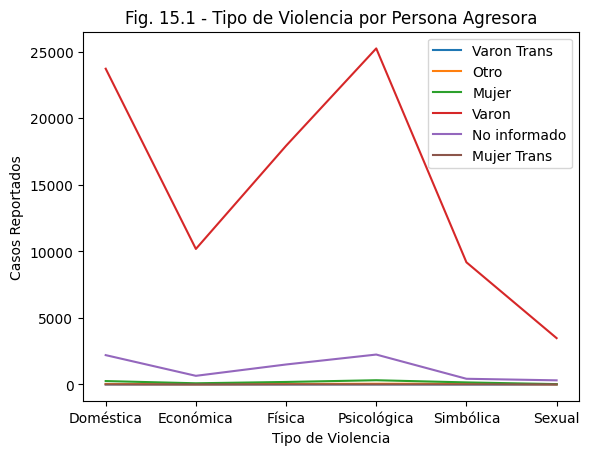

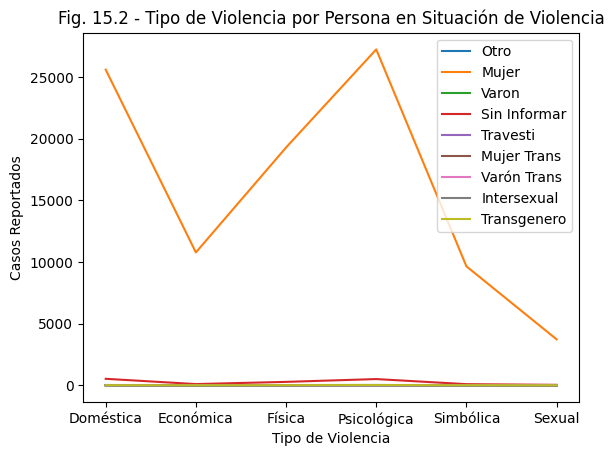

In [ ]:

# Obtener los nombres de las columnas que contienen géneros
genero_agresora_cols = [col for col in df.columns if 'genero_de_la_persona_agresora' in col]
genero_victima_cols = [col for col in df.columns if 'genero_persona_en_situacion_de_violencia' in col]

# Obtener los géneros presentes en cada columna
generos_agresora = set(df[genero_agresora_cols].values.flatten())
generos_victima = set(df[genero_victima_cols].values.flatten())

# Otra forma de obtener esto es:
# generos_agresora = df['genero_de_la_persona_agresora'].unique()
# generos_victima = df['genero_persona_en_situacion_de_violencia'].unique()


# Obtener los tipos de violencia presentes en los datos
tipos_violencia = ['Doméstica', 'Económica', 'Física', 'Psicológica', 'Simbólica', 'Sexual']

# Crear un gráfico para el tipo de violencia por persona agresora
fig, ax = plt.subplots()
for genero in generos_agresora:
    genero_df = df[df[genero_agresora_cols].eq(genero).any(axis=1)]
    counts = genero_df[tipos_violencia].count()
    ax.plot(counts.index, counts.values, label=genero)
ax.set_xlabel('Tipo de Violencia')
ax.set_ylabel('Casos Reportados')
ax.set_title('Fig. 15.1 - Tipo de Violencia por Persona Agresora')
ax.legend()

# Crear un gráfico para el tipo de violencia por persona en situación de violencia
fig, ax = plt.subplots()
for genero in generos_victima:
    genero_df = df[df[genero_victima_cols].eq(genero).any(axis=1)]
    counts = genero_df[tipos_violencia].count()
    ax.plot(counts.index, counts.values, label=genero)
ax.set_xlabel('Tipo de Violencia')
ax.set_ylabel('Casos Reportados')
ax.set_title('Fig. 15.2 - Tipo de Violencia por Persona en Situación de Violencia')
ax.legend()

plt.show()

<ipython-input-63-8c603cbf6e57>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped = df.groupby(['vinculo_con_la_persona_agresora'])['Doméstica', 'Económica', 'Física', 'Psicológica', 'Simbólica', 'Sexual'].sum().reset_index()


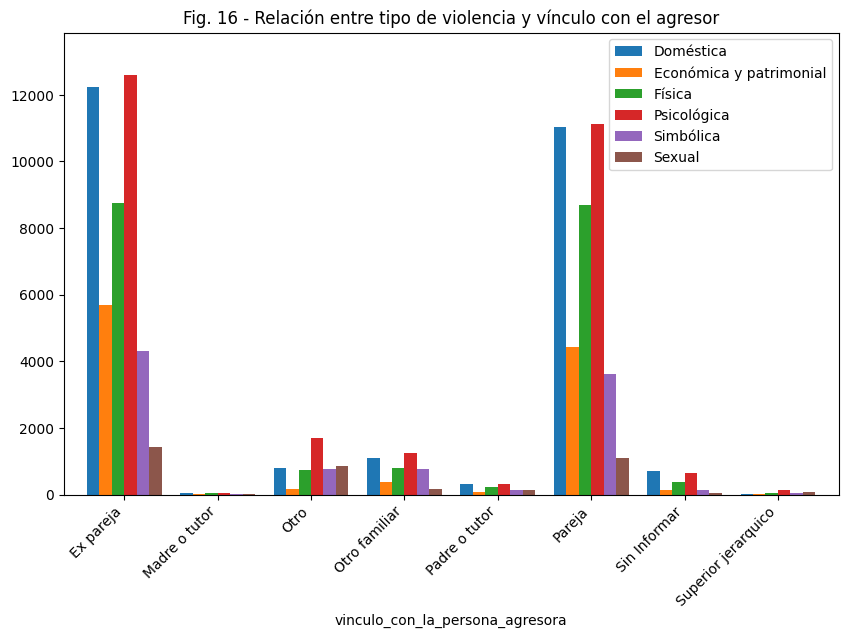

In [ ]:
# Agrupar los datos por vínculo con la persona agresora y tipo de violencia, y sumar la cantidad de casos
df_grouped = df.groupby(['vinculo_con_la_persona_agresora'])['Doméstica', 'Económica', 'Física', 'Psicológica', 'Simbólica', 'Sexual'].sum().reset_index()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10,6))
df_grouped.plot(x='vinculo_con_la_persona_agresora', y=['Doméstica', 'Económica', 'Física', 'Psicológica', 'Simbólica', 'Sexual'], kind='bar', ax=ax, width=0.8)

# Ajustar las etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Agregar las leyendas
plt.legend(['Doméstica', 'Económica y patrimonial', 'Física', 'Psicológica', 'Simbólica', 'Sexual'], loc='upper right')
plt.ylim(bottom=0, top=df_grouped[['Doméstica', 'Económica', 'Física', 'Psicológica', 'Simbólica', 'Sexual']].max().max() * 1.1)
# Mostrar el gráfico
ax.set_title('Fig. 16 - Relación entre tipo de violencia y vínculo con el agresor')
plt.show()

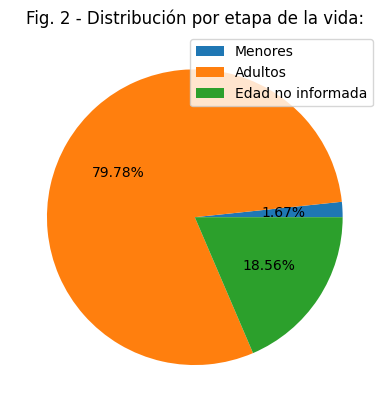

In [ ]:
#Contamos la cantidad de menores y mayores sobre el total de casos. Tambión contamos los casos con edad no informada:

#Excluimos las edades no informadas
edad = df[(df['edad_persona_en_situacion_de_violencia']>0)].edad_persona_en_situacion_de_violencia

menores = df[(df.edad_persona_en_situacion_de_violencia<18) & (df.edad_persona_en_situacion_de_violencia>0)]
adultos = df[df.edad_persona_en_situacion_de_violencia>17]
edad_no_informada = df[df.edad_persona_en_situacion_de_violencia==0]

contar_menores=menores['edad_persona_en_situacion_de_violencia'].count()
contar_adultos=adultos['edad_persona_en_situacion_de_violencia'].count()
contar_edad_no_informada_no_informada = df[df.edad_persona_en_situacion_de_violencia==0].edad_persona_en_situacion_de_violencia.count()

fig, ax = plt.subplots()
plt.title("Fig. 2 - Distribución por etapa de la vida:")
ax.pie([contar_menores,contar_adultos,contar_edad_no_informada_no_informada], autopct='%1.2f%%')
ax.legend(labels=['Menores','Adultos','Edad no informada'])
plt.show()

875


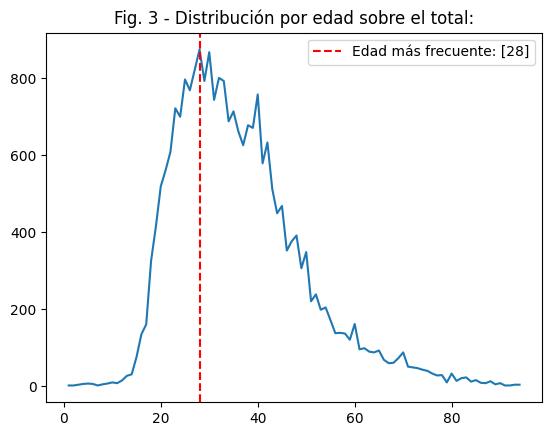

In [ ]:
#Hacemos un análisis estadístico básico de la edad, y le sumamos mediana, moda y varianza. Lo ideal sería poder hacerlo con concat.

edad_analisis = edad.describe()
edad_moda = edad.mode()
edad_varianza = edad.var()
edad_agrupada = edad.value_counts()
edad_agrupada = edad_agrupada.sort_index()
print(edad_agrupada[28])

fig, ax = plt.subplots()
plt.title("Fig. 3 - Distribución por edad sobre el total:")
ax.plot(edad_agrupada.index,edad_agrupada.values)
ax.axvline(x=edad_moda.values, color='r',label="Edad más frecuente: "+str(edad_moda.values), linestyle="dashed")
ax.legend()
plt.show()


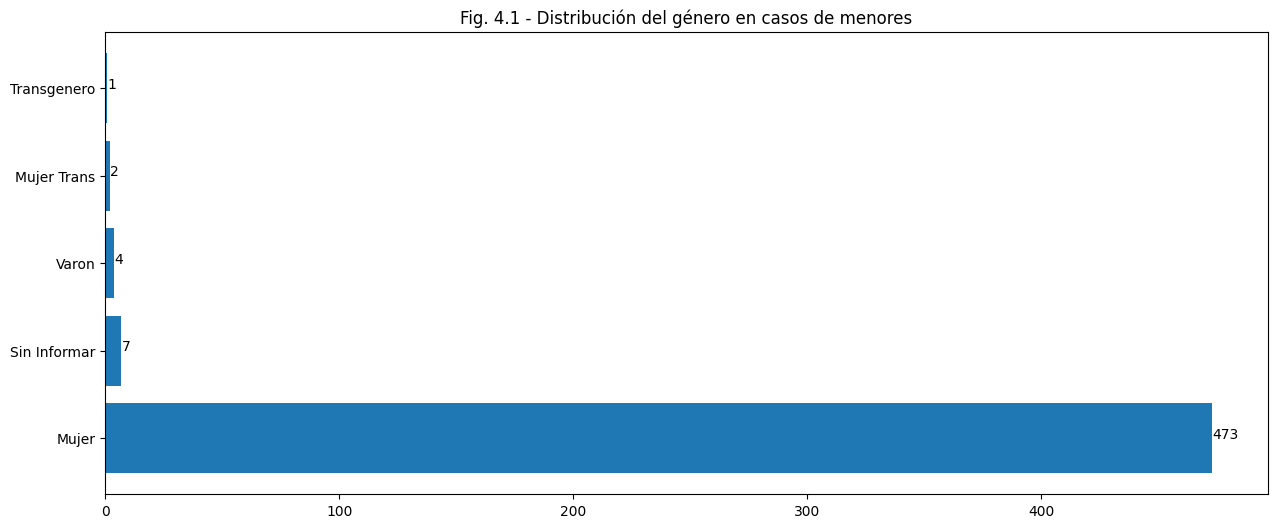

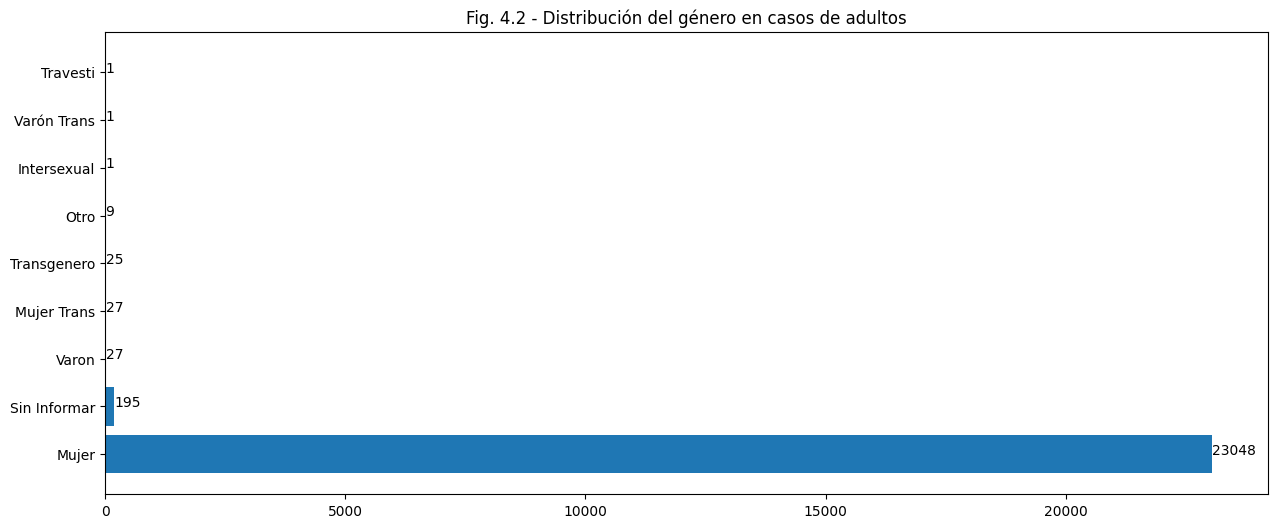

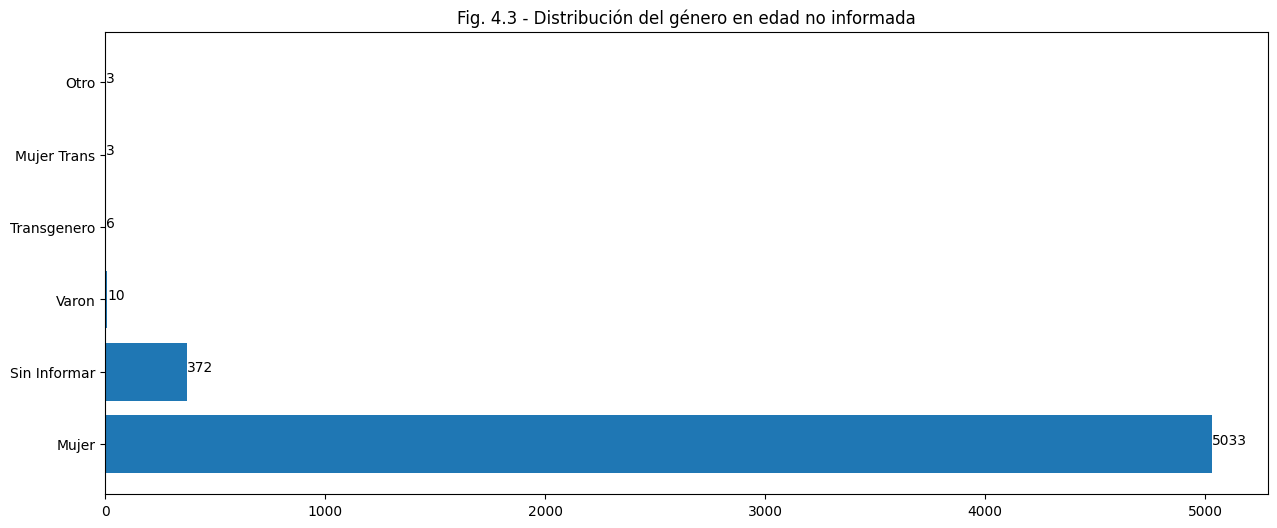

In [ ]:
#Mostramos la distribución de casos por género tanto para adultos como para menores:

genero_por_menores=menores.genero_persona_en_situacion_de_violencia.value_counts()
genero_por_adultos = adultos.genero_persona_en_situacion_de_violencia.value_counts()
genero_por_no_informado = edad_no_informada.genero_persona_en_situacion_de_violencia.value_counts()



fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.title("Fig. 4.1 - Distribución del género en casos de menores")
bar = ax.barh(genero_por_menores.index, genero_por_menores.values)
for i in range(len(genero_por_menores.index)):
  plt.text(genero_por_menores.values[i],i,genero_por_menores.values[i])
plt.show()
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.title("Fig. 4.2 - Distribución del género en casos de adultos")
ax.barh(genero_por_adultos.index, genero_por_adultos.values)
for i in range(len(genero_por_adultos.index)):
  plt.text(genero_por_adultos.values[i],i,genero_por_adultos.values[i])
plt.show()
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.title("Fig. 4.3 - Distribución del género en edad no informada")
ax.barh(genero_por_no_informado.index, genero_por_no_informado.values)
for i in range(len(genero_por_no_informado.index)):
  plt.text(genero_por_no_informado.values[i],i,genero_por_no_informado.values[i])
plt.show()



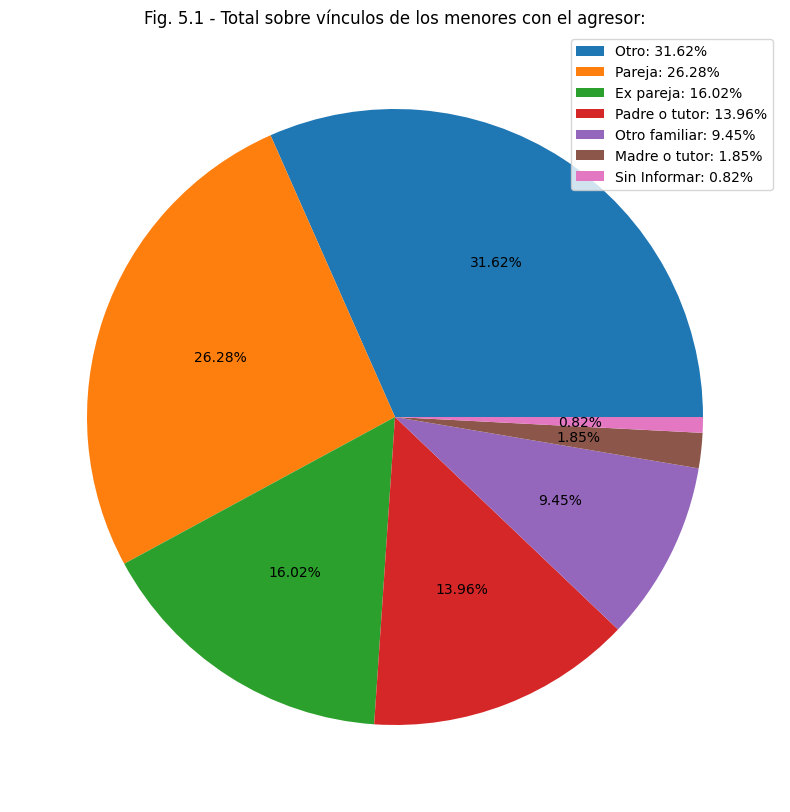

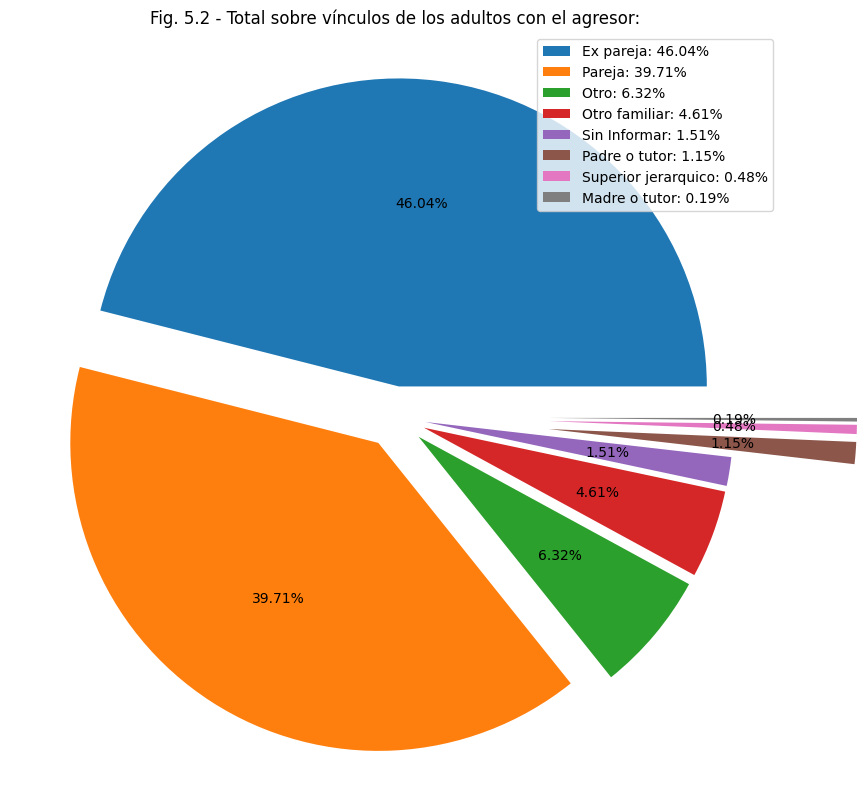

In [ ]:
#Mostramos los vínculos con el agresor, respectivamente para los menores y para los mayores. Por total y por género del agresor:

#Quizás acá sería más interesante si desglosamos NNyA (niños, niñas y adolescentes) en niños y adolescentes por separado.

vinculo_menores_agresor = menores['vinculo_con_la_persona_agresora'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
#hacemos desempaquetado de las variables que devuelve el gráfico:
values, _, percentages = ax.pie(vinculo_menores_agresor.values, autopct='%1.2f%%')
#y con los porcentajes, creamos una lista con compresión de listas para agregárselos a los labels
lab=[f'{index}: {porc_porcion.get_text()}' for index, porc_porcion in zip(vinculo_menores_agresor.index, percentages)]
plt.title("Fig. 5.1 - Total sobre vínculos de los menores con el agresor:")
ax.legend(labels=lab)
plt.show()


vinculo_adultos_agresor = adultos['vinculo_con_la_persona_agresora'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
#hacemos desempaquetado de las variables que devuelve el gráfico:
values, _, percentages = ax.pie(vinculo_adultos_agresor.values , explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5), autopct='%1.2f%%')
#y con los porcentajes, creamos una lista con compresión de listas para agregárselos a los labels
lab=[f'{index}: {porc_porcion.get_text()}' for index, porc_porcion in zip(vinculo_adultos_agresor.index, percentages)]
plt.title("Fig. 5.2 - Total sobre vínculos de los adultos con el agresor:")
ax.legend(labels=lab)
plt.show()



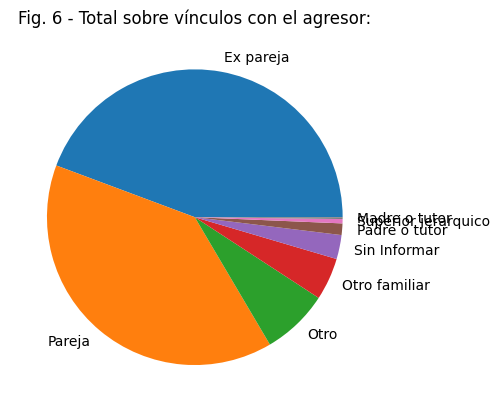

In [ ]:
#Mostramos los vínculos con el agresor sobre el total y la distribución por género
vinculo_agresor = df['vinculo_con_la_persona_agresora'].value_counts()

fig, ax = plt.subplots()
ax.pie(vinculo_agresor.values, labels=vinculo_agresor.index)
plt.title("Fig. 6 - Total sobre vínculos con el agresor:")
plt.show()

grupo_edad   Totales                \
vinculo_con_la_persona_agresora                  Ex pareja Madre o tutor   
0                                 de 1 a 10 años       2.0           1.0   
1                                de 10 a 20 años    2472.0          21.0   
2                                de 20 a 30 años    3428.0          14.0   
3                                de 30 a 40 años    3714.0          12.0   
4                                de 40 a 50 años    2351.0           3.0   
5                                de 50 a 60 años     776.0           2.0   
6                                 más de 60 años     217.0           5.0   

                                                                            \
vinculo_con_la_persona_agresora   Otro Otro familiar Padre o tutor  Pareja   
0                                 17.0           2.0           8.0     2.0   
1                                747.0         313.0         141.0  2466.0   
2                                494.0         165.0         132.0  2806.0   
3                                364.0         126.0          48.0  2832.0   
4                                225.0         179.0          30.0  1946.0   
5                                171.0         202.0           9.0   857.0   
6                                125.0         366.0           1.0   548.0   

                                                                  
vinculo_con_la_persona_agresora Sin Informar Superior jerarquico  
0                                        NaN                 NaN  
1                                      429.0                33.0  
2                                       95.0                33.0  
3                                      117.0                32.0  
4                                       66.0                24.0  
5                                       40.0                14.0  
6                                       23.0                 2.0

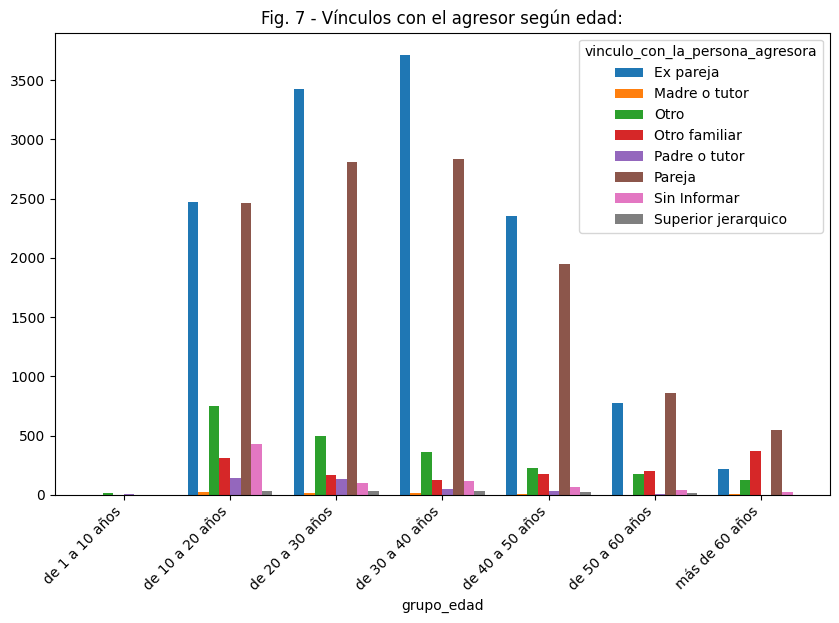

In [ ]:
#Mostramos el vínculo predominante en cada grupo de edad:
vinculo_por_edad = pd.DataFrame(df.groupby('grupo_edad').vinculo_con_la_persona_agresora.value_counts().reset_index(name='Totales'))

#Realizamos una transposición de los vínculos, así podemos tener mejor organizados los datos y graficarlos:
pivot_vinculo = vinculo_por_edad.pivot_table(index='grupo_edad', columns='vinculo_con_la_persona_agresora').reset_index()
display(pivot_vinculo)

fig, ax = plt.subplots(figsize=(10,6))
pivot_vinculo.plot(x='grupo_edad', y='Totales', kind='bar', ax=ax, width=0.8)
plt.xticks(rotation=45, ha='right')
plt.title("Fig. 7 - Vínculos con el agresor según edad:")
plt.show()

In [ ]:
#Totales, provincia con mínimo, y provincia con máximo. Utilizamos el género de la víctima para hacer el conteo.

totales_por_prov = df.groupby('Ubicación').genero_persona_en_situacion_de_violencia.count()
totales_por_prov = pd.DataFrame(totales_por_prov.reset_index(name="Total de casos"))
prov_menor_total = totales_por_prov[totales_por_prov['Total de casos']==totales_por_prov['Total de casos'].min()]
prov_mayor_total = totales_por_prov[totales_por_prov['Total de casos']==totales_por_prov['Total de casos'].max()]
display(totales_por_prov)
display(prov_menor_total)
display(prov_mayor_total)

,Ubicación,Total de casos
0,"Buenos Aires, Argentina",16423
1,"Catamarca, Argentina",73
2,"Chaco, Argentina",238
3,"Chubut, Argentina",96
4,"Ciudad Autónoma de Buenos Aires, Argentina",5217
5,"Corrientes, Argentina",136
6,"Córdoba, Argentina",824
7,"Entre Ríos, Argentina",209
8,"Formosa, Argentina",117
9,"Jujuy, Argentina",443


,Ubicación,Total de casos
10,"La Pampa, Argentina",25


,Ubicación,Total de casos
0,"Buenos Aires, Argentina",16423


,Ubicación,Total de casos,Poblacion,Tasa de casos por 100.000
0,"Buenos Aires, Argentina",16423,17446182.0,94.135210
1,"Catamarca, Argentina",73,397469.0,18.366212
2,"Chaco, Argentina",238,1190139.0,19.997664
3,"Chubut, Argentina",96,607969.0,15.790279
4,"Ciudad Autónoma de Buenos Aires, Argentina",5217,3075646.0,169.622902
5,"Corrientes, Argentina",136,1130577.0,12.029256
6,"Córdoba, Argentina",824,3792403.0,21.727649
7,"Entre Ríos, Argentina",209,1385961.0,15.079789
8,"Formosa, Argentina",117,640821.0,18.257829
9,"Jujuy, Argentina",443,780891.0,56.730069


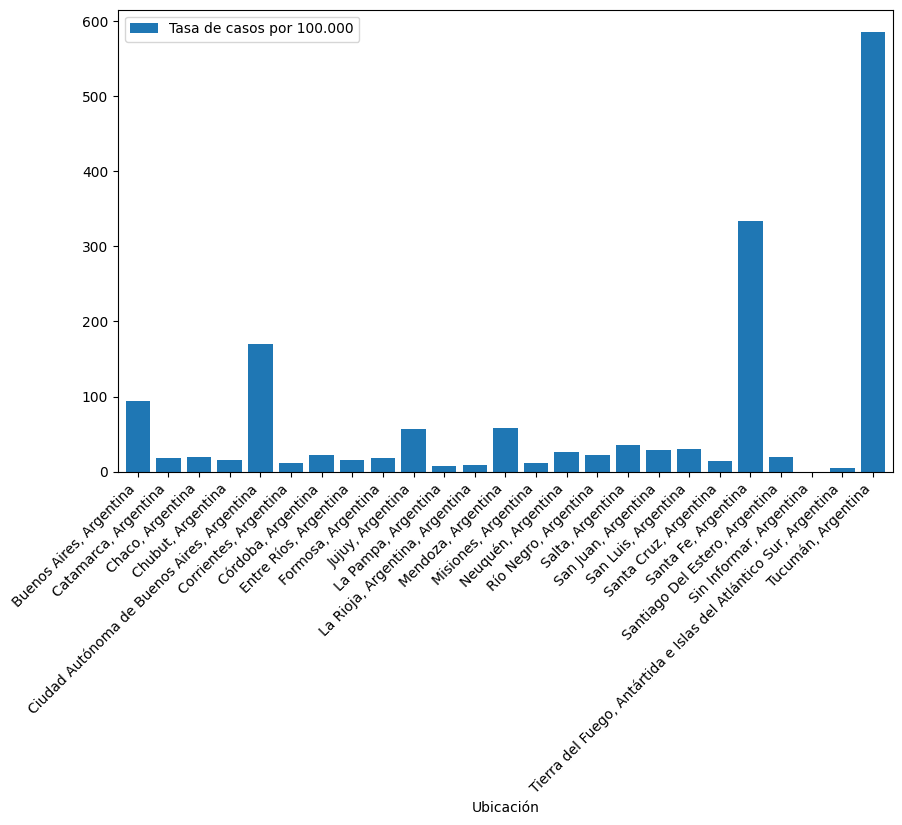

In [ ]:
#Ahora sobre esto, hacemos un análisis de cantidad de casos cada 100.000 habitantes
poblacion_provincia = pd.DataFrame({
    "Ubicación": ["Buenos Aires, Argentina", "Catamarca, Argentina", "Chaco, Argentina", "Chubut, Argentina", 
                  "Ciudad Autónoma de Buenos Aires, Argentina", "Córdoba, Argentina", "Corrientes, Argentina", 
                  "Entre Ríos, Argentina", "Formosa, Argentina", "Jujuy, Argentina", "La Pampa, Argentina", 
                  "La Rioja, Argentina, Argentina", "Mendoza, Argentina", "Misiones, Argentina", "Neuquén, Argentina", 
                  "Río Negro, Argentina", "Salta, Argentina", "San Juan, Argentina", "San Luis, Argentina", 
                  "Santa Cruz, Argentina", "Santa Fe, Argentina", "Santiago Del Estero, Argentina", "Tierra del Fuego, Antártida e Islas del Atlántico Sur, Argentina", "Tucumán, Argentina"],
    "Poblacion": [17446182, 397469, 1190139, 607969, 3075646, 3792403, 1130577, 1385961, 640821, 780891, 
                  358428, 791637, 2040458, 1189446, 711774, 747610, 1333365, 739957, 507886, 273964, 
                  373856, 988245, 548637, 160720]
})
totales_y_poblacion = pd.merge(totales_por_prov,poblacion_provincia,on='Ubicación', how='left')
totales_y_poblacion['Tasa de casos por 100.000'] = totales_y_poblacion['Total de casos'] / totales_y_poblacion['Poblacion'] * 100000
display(totales_y_poblacion)
fig, ax = plt.subplots(figsize=(10,6))
totales_y_poblacion.plot(x='Ubicación', y='Tasa de casos por 100.000', kind='bar', ax=ax, width=0.8)
plt.xticks(rotation=45, ha='right')
plt.show()

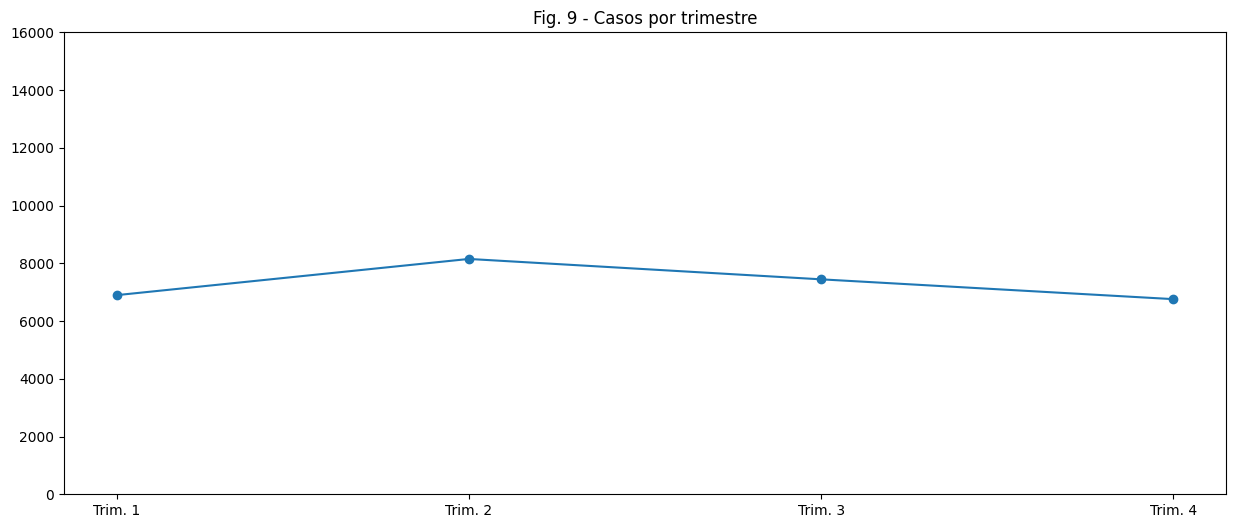

Trim. 1    6896
Trim. 2    8150
Trim. 3    7444
Trim. 4    6758
Name: Trimestre, dtype: int64


In [ ]:
#Mostramos los totales de casos por trimestre para poder calcular una tendencia.
trimestres = ['Trim. 1','Trim. 2','Trim. 3','Trim. 4']
conteo_trimestre = df['Trimestre'].value_counts()
conteo_trimestre = conteo_trimestre.reindex(trimestres,axis=0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.title('Fig. 9 - Casos por trimestre')
ax.plot(conteo_trimestre.index,conteo_trimestre.values,marker='o')
ax.set_ylim(bottom=0,top=16000)
plt.show()

print(conteo_trimestre)

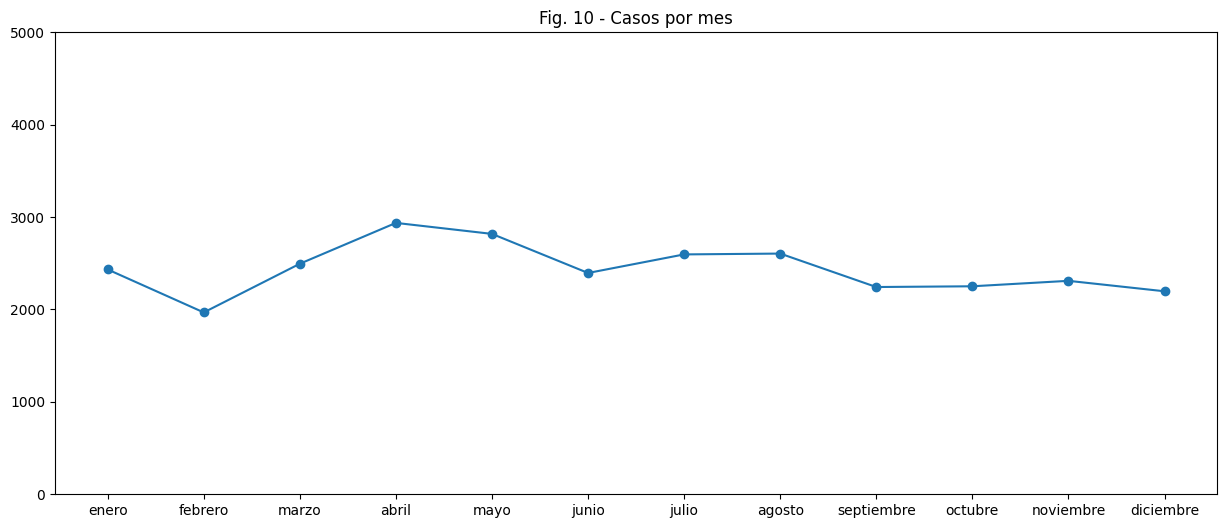

enero         2433
febrero       1968
marzo         2495
abril         2937
mayo          2818
junio         2395
julio         2596
agosto        2605
septiembre    2243
octubre       2251
noviembre     2310
diciembre     2197
Name: Mes, dtype: int64


In [ ]:
#Mostramos los totales de casos por mes para poder calcular una tendencia.

meses = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']
casos_por_mes = df['Mes'].value_counts()
casos_por_mes = casos_por_mes.reindex(meses,axis=0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.title('Fig. 10 - Casos por mes')
ax.plot(casos_por_mes.index,casos_por_mes.values,marker='o')
ax.set_ylim(bottom=0, top=5000)
plt.show()

print(casos_por_mes)

min     1968.000000
max     2937.000000
mean    2437.333333
25%     2249.000000
50%     2414.000000
75%     2598.250000
Name: Mes, dtype: float64

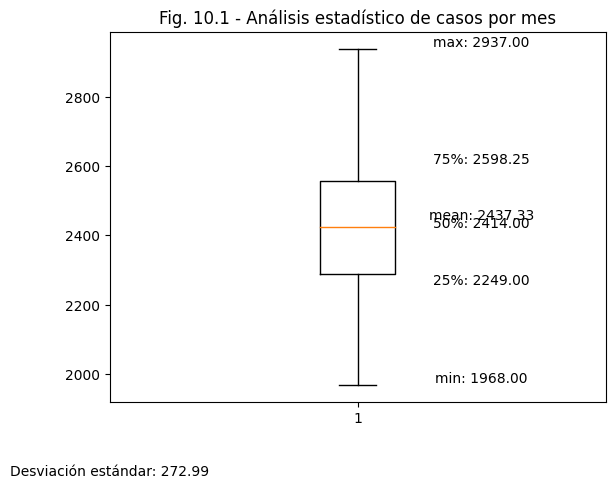

In [ ]:
#Mostramos los cálculos estadísticos básicos para cada mes:

analisis_mes = casos_por_mes.describe().loc[['min','max','mean','25%','50%','75%']]
std_mes = casos_por_mes.std()
display(analisis_mes)

plt.title('Fig. 10.1 - Análisis estadístico de casos por mes')
xpoints = np.array(analisis_mes.index)
ypoints = np.array(analisis_mes.values)
for i, punto in enumerate(xpoints):
    plt.text(1.25, analisis_mes[punto], f'{punto}: {analisis_mes[punto]:.2f}', ha='center', va='bottom', fontsize=10)
plt.text(0, -0.2, f"Desviación estándar: {std_mes:.2f}", transform=plt.gca().transAxes, ha='center', fontsize=10)
plt.boxplot(ypoints)
plt.show()



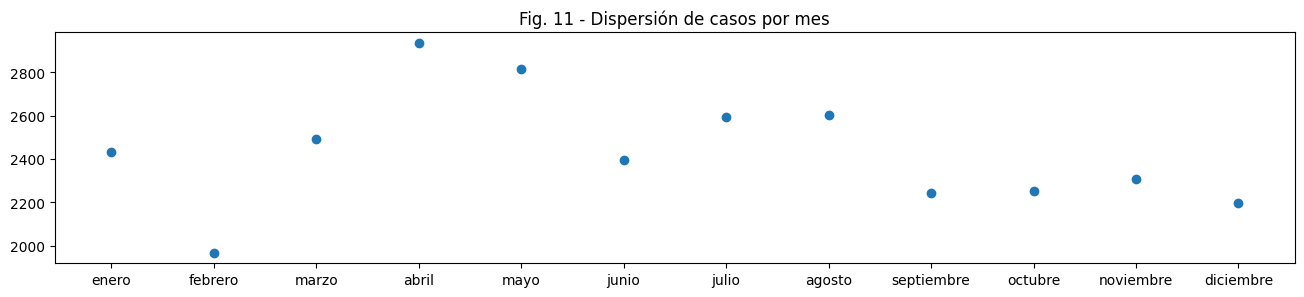

In [ ]:
  #Gráfico de dispersión y correlación.

  fig = plt.gcf()
  plt.title("Fig. 11 - Dispersión de casos por mes")
  plt.scatter(meses,casos_por_mes)
  fig.set_size_inches(16, 3)
  plt.show()


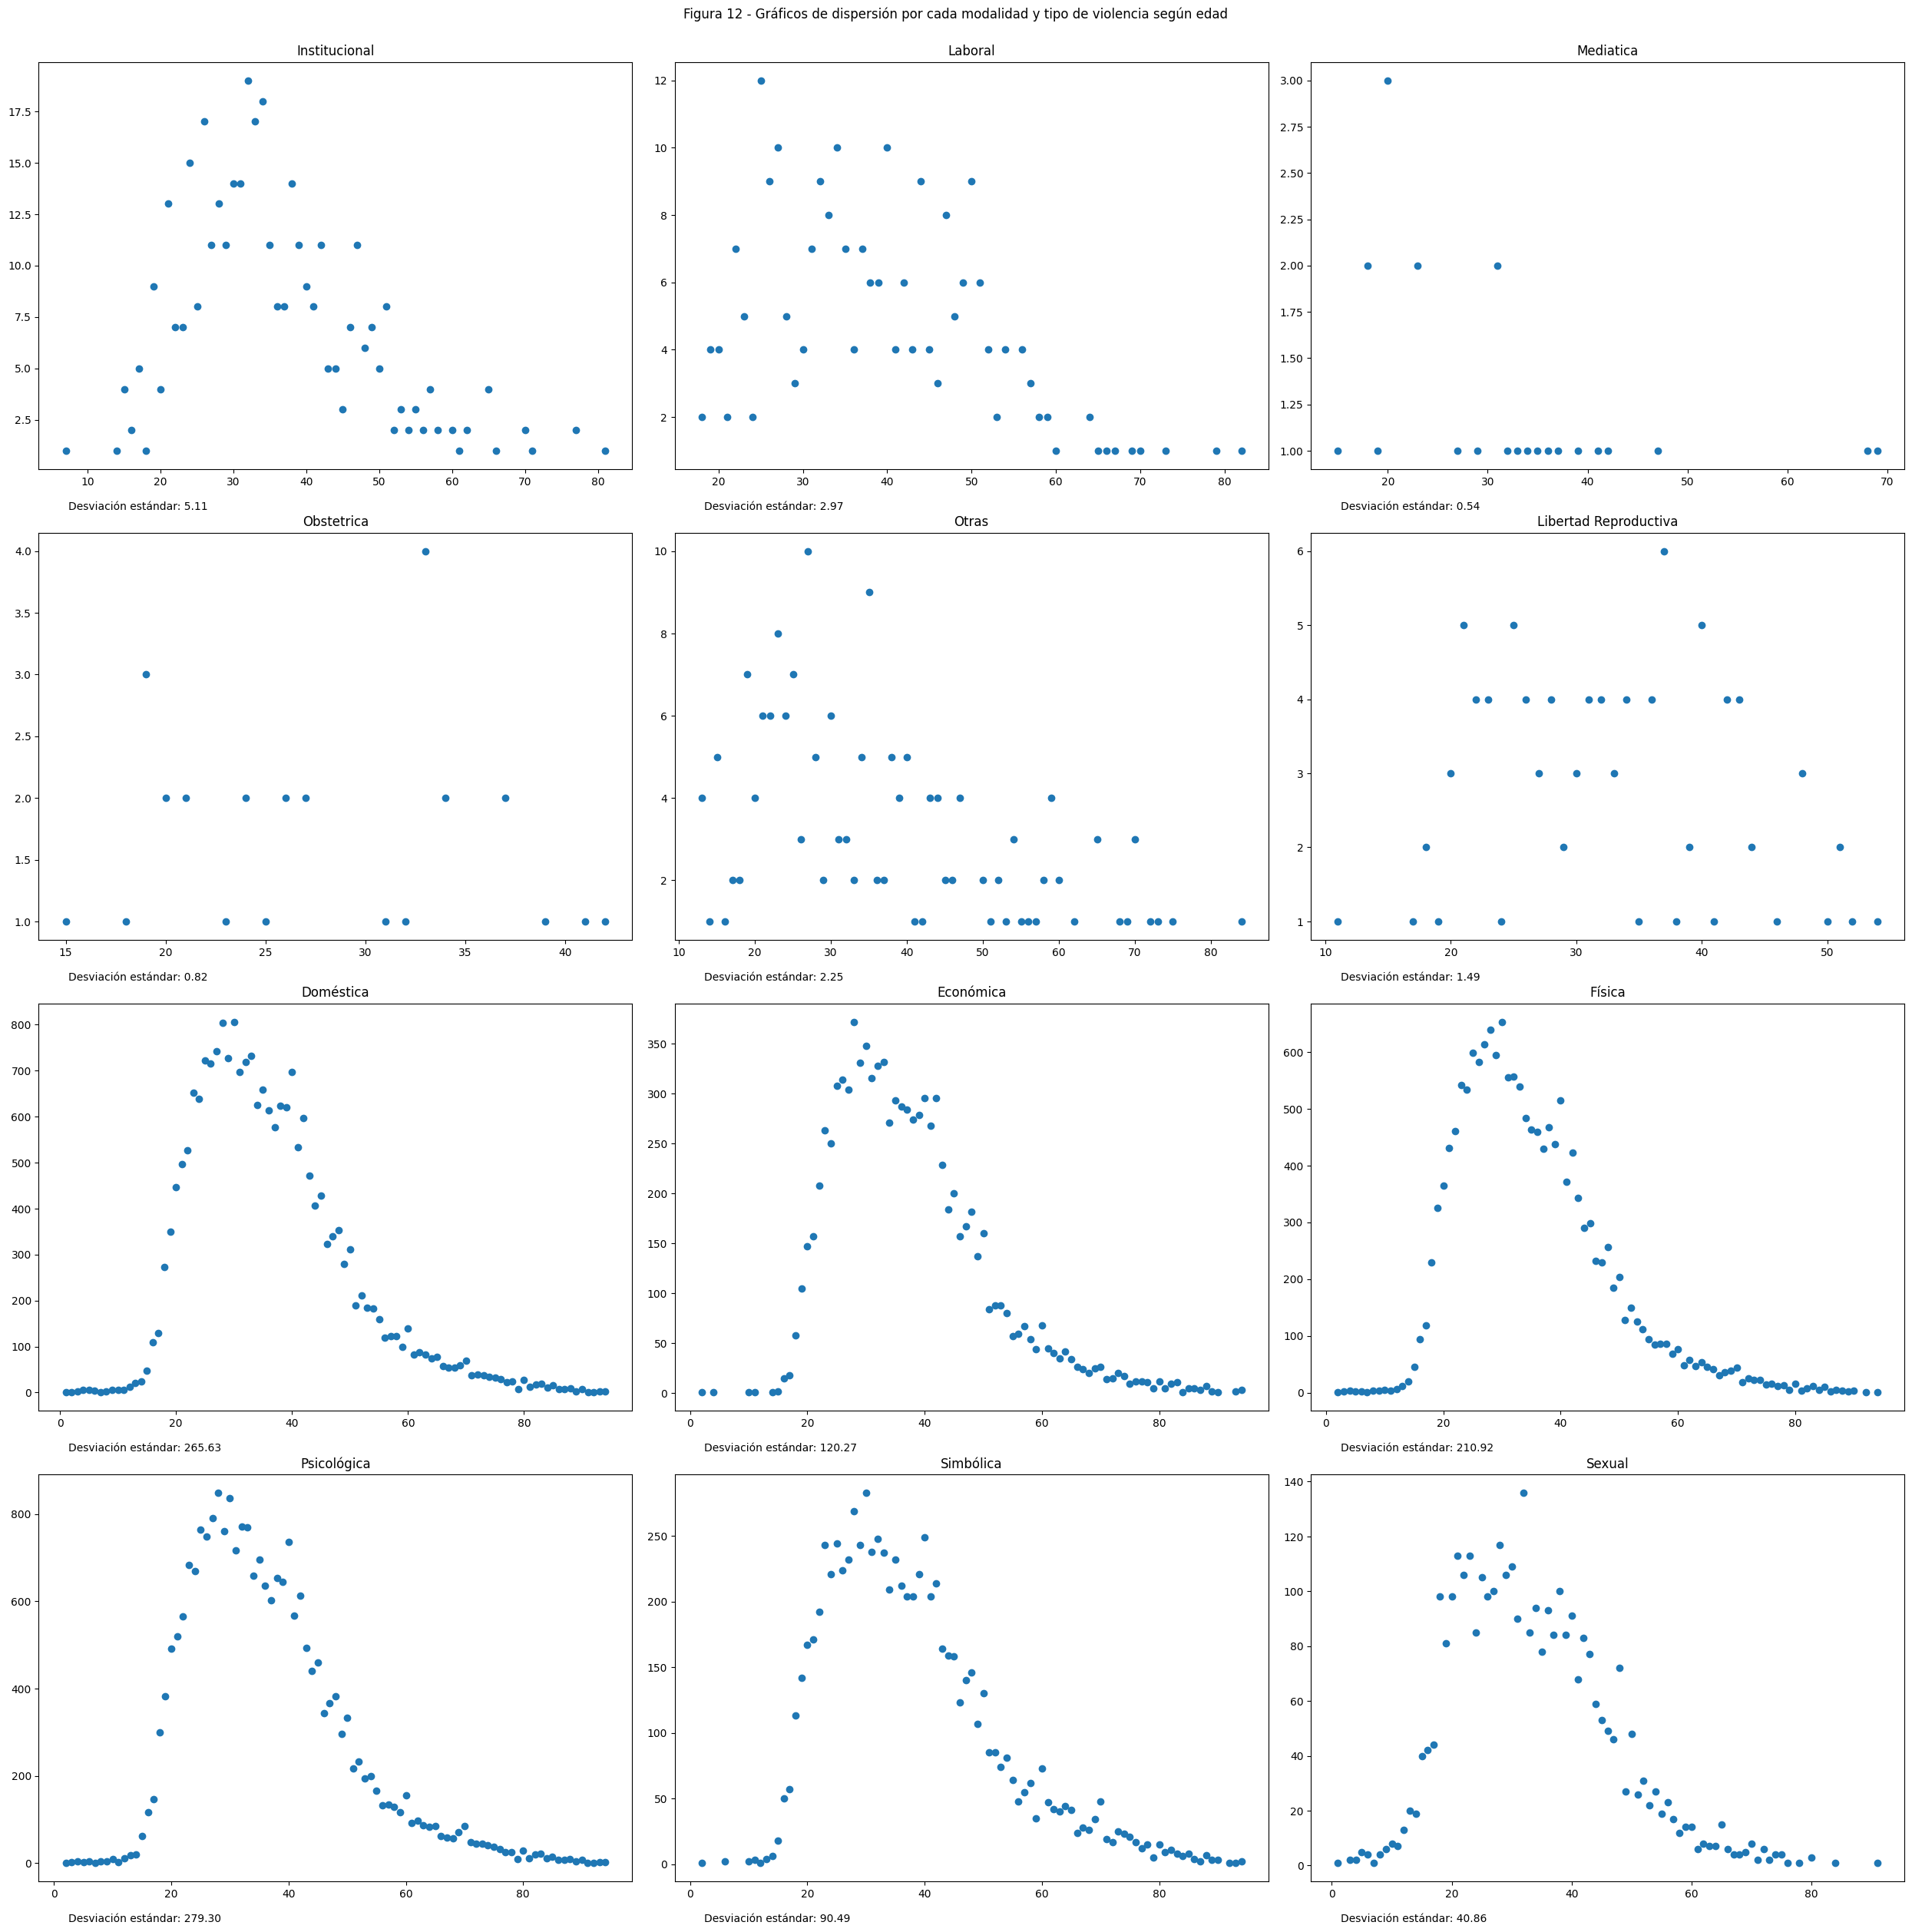

In [ ]:
#Hacemos un gráfico de dispersión por cada tipo de violencia según edad.
violencias = ['Doméstica','Económica','Física','Psicológica','Simbólica','Sexual']
modalidades = ['Institucional','Laboral','Mediatica','Obstetrica','Otras','Libertad Reproductiva']
violencias_titulos = ['Violencia Doméstica', 'Violencia Económica', 'Violencia Física', 'Violencia Psicológica', 'Violencia Simbólicas', 'Violencia Sexual']
modalidades_titulos = ['Violencia Institucional', 'Violencia Laboral', 'Violencia Mediática', 'Violencia Obstétrica', 'Otras modalidades', 'Libertad Reproductiva']

violencias_agrupada = df.groupby('edad_persona_en_situacion_de_violencia').count().reset_index()
violencias_agrupada = pd.DataFrame(violencias_agrupada)

#Excluimos los casos que no tienen edad informada:
violencias_agrupada = violencias_agrupada[(violencias_agrupada['edad_persona_en_situacion_de_violencia']>0)]

#Quitamos las columnas que no nos interesa para el análisis:
violencias_agrupada = violencias_agrupada.drop(columns=['Ubicación','grupo_edad','Año','Trimestre','Mes','Día','genero_de_la_persona_agresora','genero_persona_en_situacion_de_violencia','pais_nacimiento_persona_en_situacion_de_violencia','vinculo_con_la_persona_agresora'],axis=1)
#Eliminamos los puntos que se reportan 
violencias_agrupada = violencias_agrupada.replace(0, np.nan)

fig, axs = plt.subplots(nrows=round(len(violencias_agrupada.columns)/3), ncols=3, figsize=(25, 25))
fig.suptitle("Figura 12 - Gráficos de dispersión por cada modalidad y tipo de violencia según edad", y=1)
axs = axs.flatten()
for i,col in enumerate(violencias_agrupada.columns):
  if col=='edad_persona_en_situacion_de_violencia':
    continue
  axs[i-1].scatter(violencias_agrupada.edad_persona_en_situacion_de_violencia,violencias_agrupada[col])
  axs[i-1].set_title(col)
  std_dev = np.std(violencias_agrupada[col])
  axs[i-1].text(0.05, -0.1, f"Desviación estándar: {std_dev:.2f}", transform=axs[i-1].transAxes)
fig.tight_layout()
plt.show()


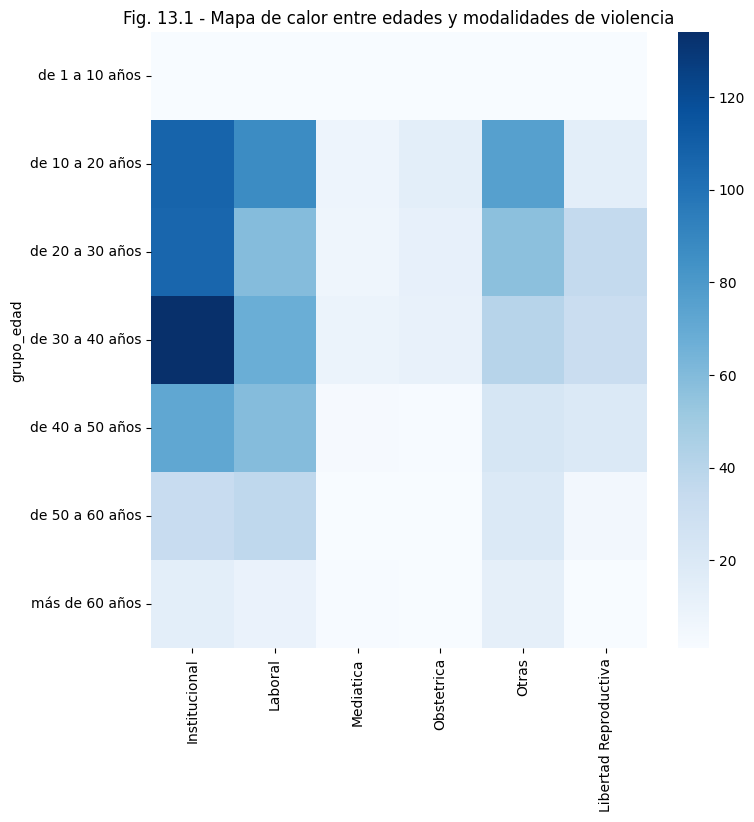

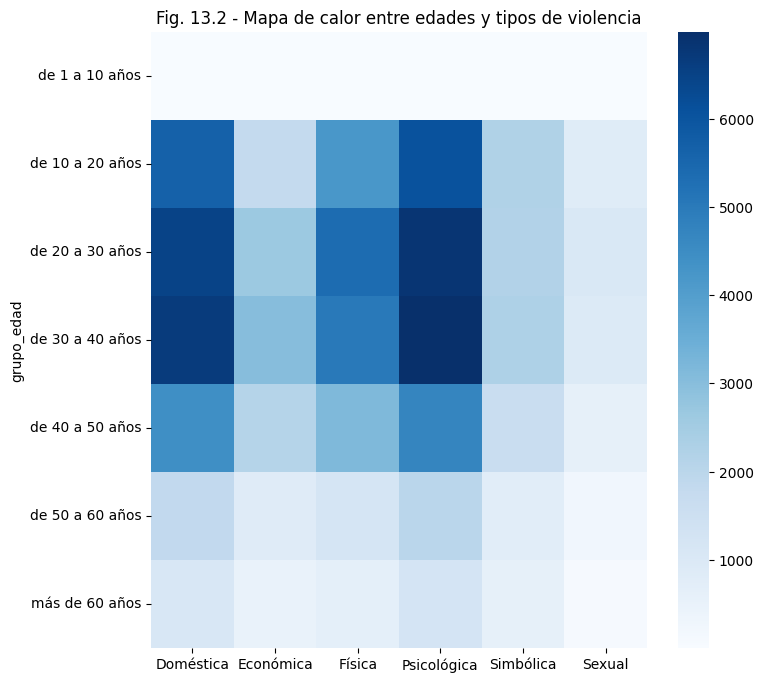

,Institucional,Laboral,Mediatica,Obstetrica,Otras,Libertad Reproductiva
Institucional,1.000000,0.913589,0.945692,0.898435,0.828716,0.896919
Laboral,0.913589,1.000000,0.820764,0.828070,0.886989,0.718386
Mediatica,0.945692,0.820764,1.000000,0.950547,0.853125,0.802093
Obstetrica,0.898435,0.828070,0.950547,1.000000,0.939452,0.745737
Otras,0.828716,0.886989,0.853125,0.939452,1.000000,0.624823
Libertad Reproductiva,0.896919,0.718386,0.802093,0.745737,0.624823,1.000000


,Doméstica,Económica,Física,Psicológica,Simbólica,Sexual
Doméstica,1.000000,0.970045,0.995555,0.999867,0.991158,0.993697
Económica,0.970045,1.000000,0.963907,0.967559,0.944247,0.960089
Física,0.995555,0.963907,1.000000,0.995028,0.978702,0.998721
Psicológica,0.999867,0.967559,0.995028,1.000000,0.992902,0.993229
Simbólica,0.991158,0.944247,0.978702,0.992902,1.000000,0.975950
Sexual,0.993697,0.960089,0.998721,0.993229,0.975950,1.000000


In [ ]:
#Hacemos gráficos de calor para las correlaciones anteriores, y mostramos la correlación Pearson.

edad_y_mod = df.groupby('grupo_edad').count()[modalidades]
plt.figure(figsize=(8, 8))
ax = sns.heatmap(edad_y_mod, cmap='Blues', vmin=1)
plt.title("Fig. 13.1 - Mapa de calor entre edades y modalidades de violencia")
plt.show()

edad_y_vio = df.groupby('grupo_edad').count()[violencias]
plt.figure(figsize=(8, 8))
ax = sns.heatmap(data=edad_y_vio, cmap='Blues')
plt.title("Fig. 13.2 - Mapa de calor entre edades y tipos de violencia")
plt.show()

display(edad_y_mod.corr())
display(edad_y_vio.corr())

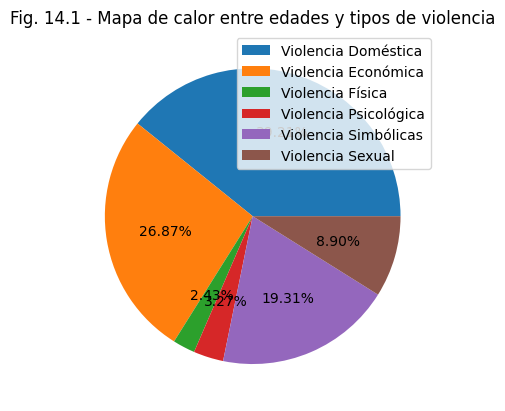

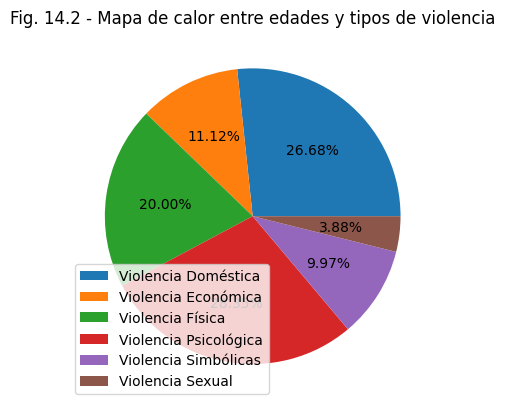

In [ ]:
#Calculamos los totales por tipo de violencia y modalidades

suma_modalidades = df[modalidades].sum()
suma_tipos_violencia = df[violencias].sum()

fig, ax = plt.subplots()
plt.title("Totales por modalidades:")
ax.pie(suma_modalidades, autopct='%1.2f%%')
ax.legend(labels=violencias_titulos)
plt.title("Fig. 14.1 - Mapa de calor entre edades y tipos de violencia")
plt.show()

fig, ax = plt.subplots()
plt.title("Totales por violencias:")
ax.pie(suma_tipos_violencia, autopct='%1.2f%%')
ax.legend(labels=violencias_titulos)
plt.title("Fig. 14.2 - Mapa de calor entre edades y tipos de violencia")
plt.show()
